## 7linear
 * 선형성 (Linearity)
 + 두 변수의 관계가하나의 직선의 형태로 설명될 수 있는 계를 지닌다는 것
 
 ## 회귀분석의 중요 개념
 * & \hat y = ax + b + \epsilon $
 * 선형방정식 : 두 변수의 관계를 방정식으로 표현
 * 기울기($a$) : 독립변수가 종속변수에 얼마나 영향을 주는지 그 크기와 방향을 파악
 * 절편($b$) : 회귀선을 얼마나 위/아래로 평행이동시키는 지 알 수 있음

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 공부한 시간 대비 성적 예측을 단순선형회귀로 풀어보자.

In [8]:
time = [2,4,6,8]
jumsu = [81,93,91,97]  

## time = 시간변수 jumsu = 점수변수 할당

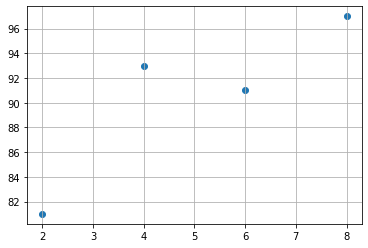

In [10]:
plt.scatter(time, jumsu)
plt.grid()

## 그래프를 그려보았다. 선형방정식은 어떻게 될까? 위의 것처럼 y는 ax+b이다. 그러니까 기울기와 절편을 구해야 회귀선을 그을 수 있겠지?
## 최소제곱법에 의거하여, 회귀모델은 실제값 y와 예측값 y의 차이가 최소가 되어야함.

## 회귀선을 그었을때 실제값과 예측값과 차이가 적은 곳에서 회귀선을 그리는 것, 그것이 최소제곱법이다. 그 공식을 활용해보자.

* $ a = \frac {\sum (x - \bar x)(y - \bar y) }        
              {\sum (x - \bar x) ^ 2} $
* $ b = \bar y - (a \cdot \bar x) $


In [23]:
# 각 변수의 평균 구함

tmean = np.mean(time)
jmean = np.mean(jumsu)
print(tmean, jmean)

# 기울기를 구하는 식 중 분자에 해당하는 수식을 함수로 정의

def divtop(x, xmean, y, ymean):
    sums = 0
    for i in range(len(x)):
        sums += (x[i] - xmean) * (y[i] - ymean)
        return sums

5.0 90.5


In [29]:
# 기울기를 구하기 위한 공식에서 분자와 분모부분을 각각 구함

dividen = divtop(time, tmean, jumsu, jmean)
divsor = [ (t - tmean)**2 for t in time ]  # **2= 곱하기 2

# 기울기와 절편 계산
a = dividen / divsor
b = jmean - (a * tmean)
print(a,b)

[ 3.16666667 28.5        28.5         3.16666667] [ 74.66666667 -52.         -52.          74.66666667]


In [39]:
## 예측값을 넣어 회귀선을 그려봄
## * 구해진 선형방정식(y = 2.3x + 79)에 x값을 넣어 예측값 산출
z = [ (a * t + b) for t in time ]
z

[array([81.,  5.,  5., 81.]),
 array([87.33333333, 62.        , 62.        , 87.33333333]),
 array([ 93.66666667, 119.        , 119.        ,  93.66666667]),
 array([100., 176., 176., 100.])]

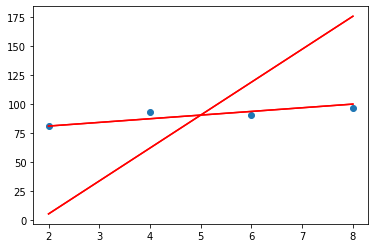

In [43]:
# 실제값과 예측선을 시각화

plt.scatter(time, jumsu)
plt.plot(time, z, 'r')

## 이 선들이 보이나? 이것 바로 최적의 회귀분석값이라는 것이다.

## 평균제곱근 오차 RMSE
* 최소제곱법을 이용해서 회귀직선을 그어 보았지만
  다양한 상황에 적합한 직선을 긋기에는 부족
* 즉, 여러 개의 독립변수로 구성된 데이터에 대한 회귀직선을 긋기에는 무리가 있음
* 따라서, 여러 독립변수로 구서된 데이터의 경우 임의의 선을 그린 후 
  이 선의 오차를 평가하고 조금씩 수정해 나가는 방법이 필요
* 한편, 평균제곱근오차에서는 기울기와 절편에 아무값이나 대입하고 오차를 구해서 이 오차를 최소화하는 방식을 사용.
* MEANSQUARE 에러에서는 오차가 최소화되는 지점을 구한다. 그때 기울기와 절편값을 구한다는 내용.
* 이것이 무슨 말인지 한번 봅시다.

In [44]:
from sklearn.metrics import mean_squared_error

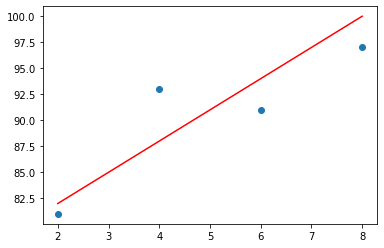

In [48]:
# 시도1 => 기울기 : 3, 절편 :76
a = 3; b = 76
z = [ (a * t + b) for t in time ]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r')

In [49]:
MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

3.3166247903554

## 3.31이라는 결과를 얻을  수 있다. 반올림해서 3.3이라고 보면 된다.

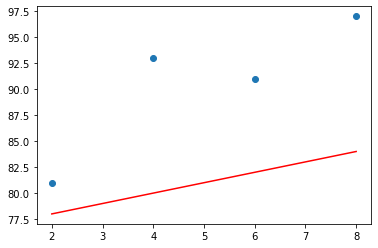

In [51]:
# 시도2 => 기울기 : 1, 절편 :76
a = 1; b = 76
z = [ (a * t + b) for t in time ]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r')

In [52]:
MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

10.344080432788601

## 10.34라는 결과를 얻을 수 있다. 이제 기울기 3으로 절편도 올려보자.

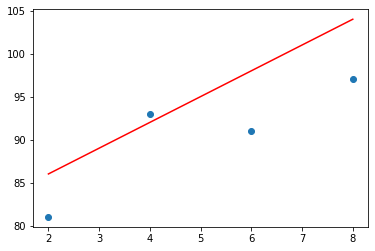

In [53]:
# 시도3 => 기울기 : 3, 절편 :80
a = 3; b = 80
z = [ (a * t + b) for t in time ]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r')

In [54]:
MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

5.5677643628300215

## 기울기가 주니까 어떻게 됬어? 옆으로 누웠죠? 점에 가깝게 붙지 않았다. 절편을 바꾸니까 고대로 평행이동만 한 셈이다.
## 기울기를 줄이니까 왼쪽으로 오른쪽으로 선과 점들이 평행이동 한 것을 알 수 있다.

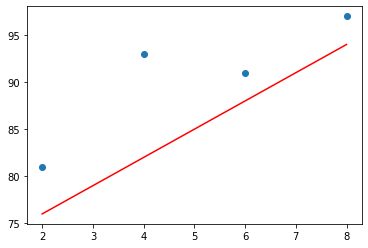

In [56]:
# 시도4 => 기울기 : 3, 절편 :70
a = 3; b = 70
z = [ (a * t + b) for t in time ]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r')

In [57]:
MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

6.4031242374328485

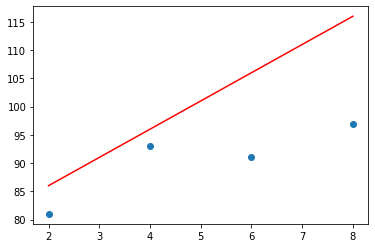

In [59]:
# 시도4 => 기울기 : 5, 절편 :76
a = 5; b = 76
z = [ (a * t + b) for t in time ]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r')

In [60]:
MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

12.449899597988733

##  12.45라는 값이 나왔다. 기울기가 증가하거나, 절편이 감소하거나 증가하냐에 따라서 절편의 값들이 차이가 난다.
## 기울기의 따른 오차 비율이 어떻게 되는지 확인해보자. 눈여겨봐야할 것은 기울기 값.

## 결론
* 기울기가 커지면 (3 -> 5) 오차가 증가 (3.31 -> 1.44)
* 기울기가 작아지면 (3 -> 1) 오차가 증가 (3.31 -> 10.34)
  + 즉, 기울기와 오차간의 상관관계가 존재.

In [61]:
# 기울기의 변화에 따른 오차의 변화를 시각화
weights = [] # 기울기
loss = []  # 오차
b = 0  # 절편은 편의상 0

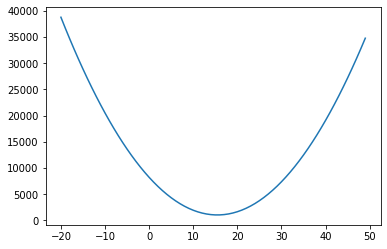

In [63]:
for w in range(-20, 50): # 기울기를 -20~50으로 설정한다.
    z = [w * v + b for v in time] # 예측값.
    weights.append(w)
    loss.append(mean_squared_error(jumsu, z))  # 오차 계산
plt.plot(weights, loss)

## 결과를 확인해보자. 어떻게 되요? 곡선의 2차 함수모양처럼 그래프가 나올 것이다. 
## 여기 보시면, 밑의 가중치(w, 기울기) 값이 계산되는 예측값들의 오차값이 나온다. 밑의 가중치가 10~20 언저리까지가 저렇게 나왔다는 것.

## 기울기와 오차의 관계.
* 그래프에서 확인하듯이 기울기와 오차의 관계는 ㅇ리차함수 형태임
* 오차가 가장 작은 부분은?
 + 그래프 하단의 볼록한 부분
* 기울기를 구하는 방법
 + 임의의 점을 선택 -> 미분 실시 -> 기울기가 0인지 확인
 + 기울기가 0일때까지 계속 반복 시행
 + 미분의 기울기를 이용한 ** 경사하강법** 을 적용

## 선형 회귀를 이용한 보스턴 집값 예측
### 1978년 보스턴 주택 가격
### 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

In [71]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 데이터 불러오기를 마쳤다.

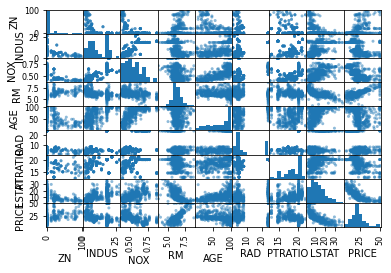

In [75]:
# 산점도 행렬.
from pandas.plotting import scatter_matrix

# ZN, INDUS, NOX, ROM, AGE, RAD, PTRATIO, LSTAT, PRICE
sm = df.iloc[:, [1,2,4,5,6,8,10,12,13]]
scatter_matrix(sm)
plt.show()

## 산점도 그래프를 그렸는데 가시성이 좋지 않다. 좀더 크게 나오게 하자.

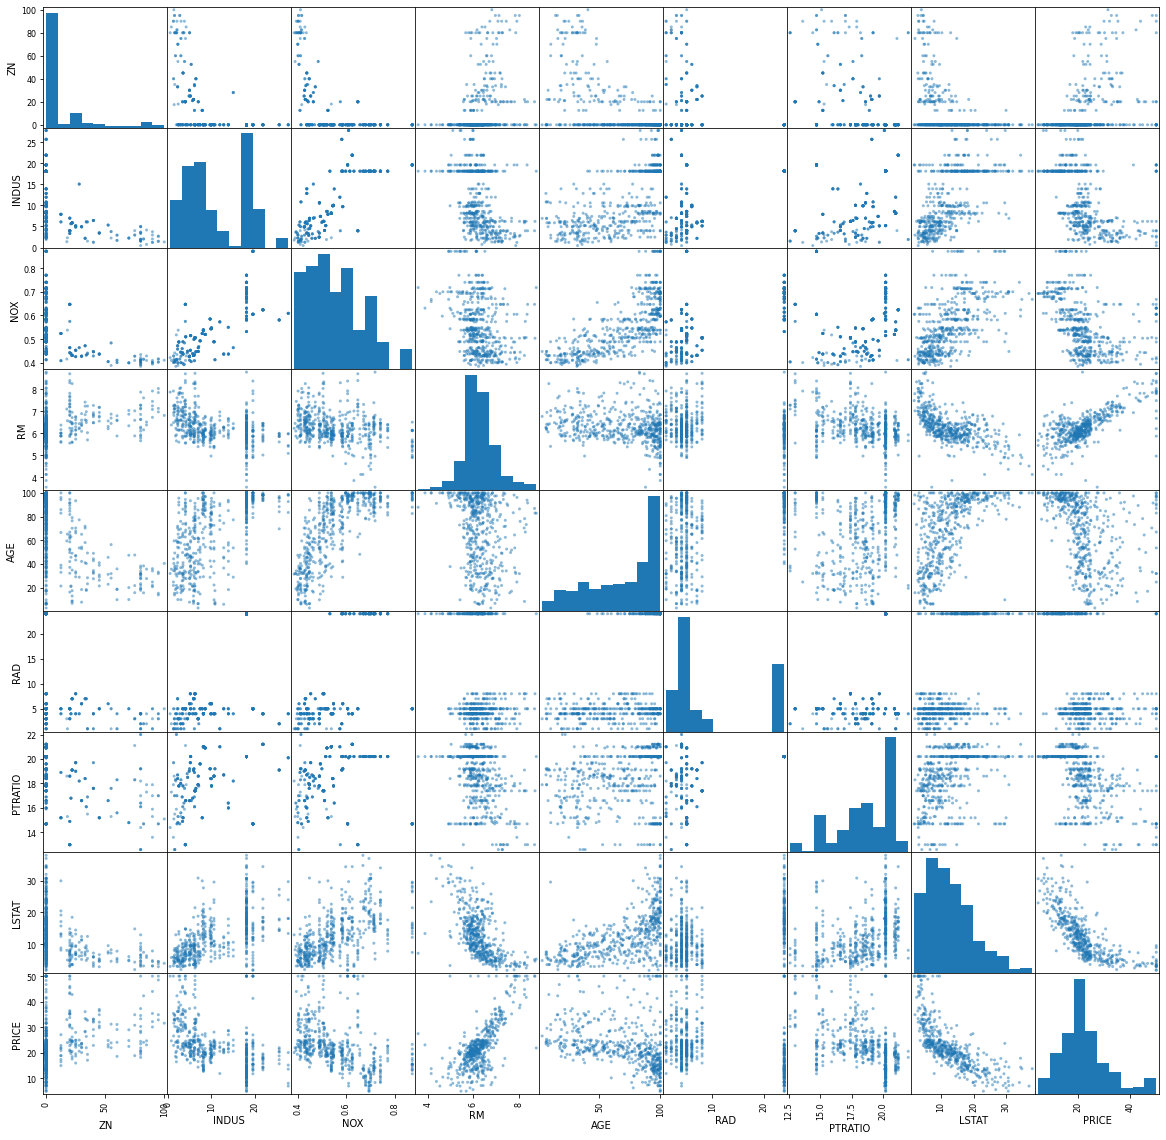

In [77]:
# ZN, INDUS, NOX, ROM, AGE, RAD, PTRATIO, LSTAT, PRICE
sm = df.iloc[:, [1,2,4,5,6,8,10,12,13]]
scatter_matrix(sm, figsize=(20,20)) # 이렇게 figsize 값을 추가해서 그래프 크기를 거대하게 조정.)
plt.show()

## 이렇게 크게 그려서 선형관계를 좀더 상세히 파악할 수 있다.

## 각 독립변수에 종속변수를 이용해서 회귀선을 그려보기

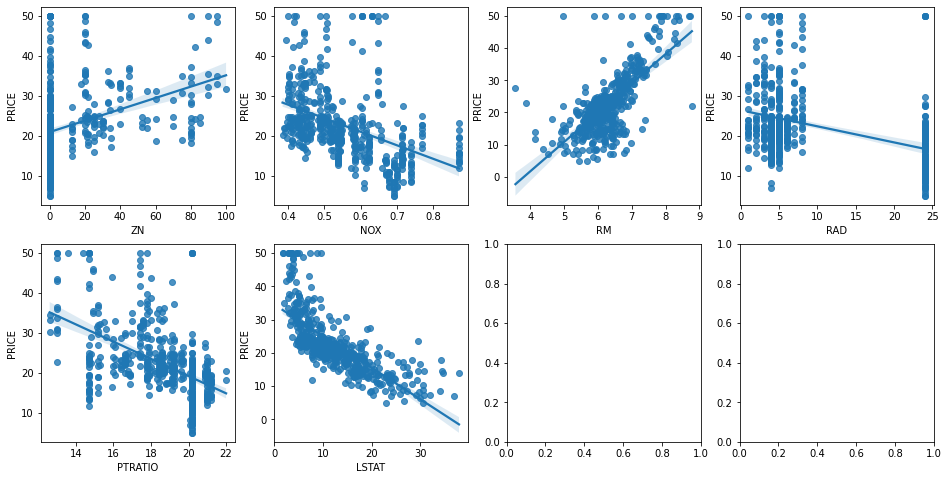

In [101]:
import seaborn as sns

features = ['ZN','NOX','RM','RAD','PTRATIO','LSTAT']
fig, ax = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

for i, feature in enumerate(features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE',
                data=df, ax=ax[row][col])
plt.show()

## 여기서, 저소득층 같은 경우는 살기 힘드니까 아무래도 범죄의 연루가 되어있는 경우가 많을 것이다. 저소득층 지역의 방들은 주택가가 싸다는 걸 알 수있다.
## 상관관계가 있긴 있는데, 확 눈에 띄는 경우는 아니다. 

# seaborn 산점도 행렬 

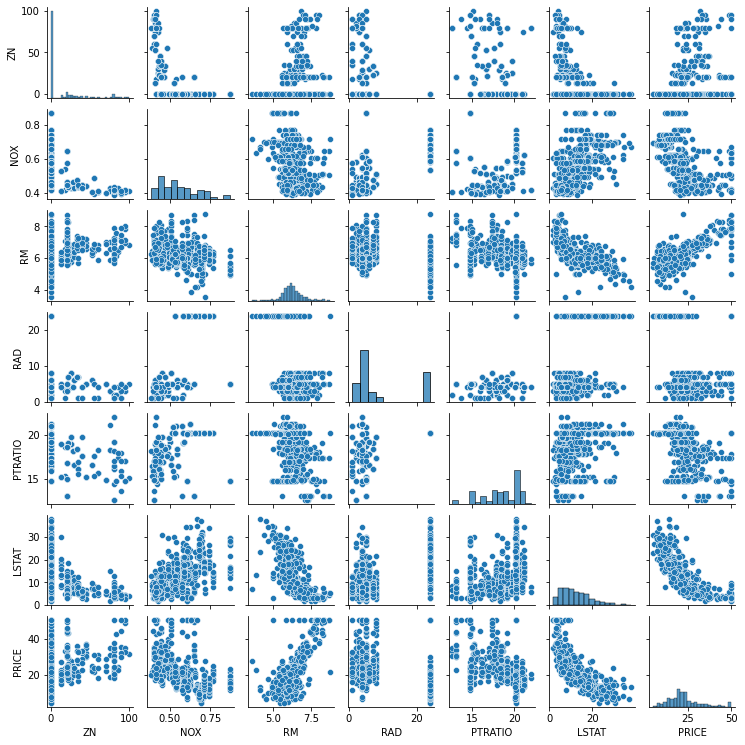

In [102]:
features = ['ZN','NOX','RM','RAD','PTRATIO','LSTAT','PRICE']
sns.pairplot(df[features], height=1.5)
plt.show()

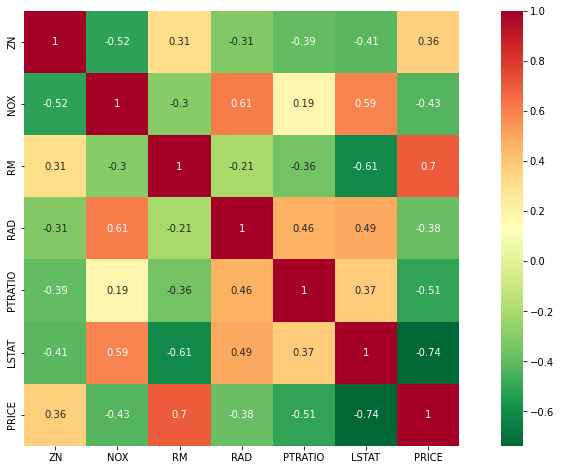

In [104]:
# 상관계수 행렬
cm = np.corrcoef(df[features].values.T)
plt.figure(figsize=(15,8))
hm = sns.heatmap(cm, cmap='RdYlGn_r', cbar=True, annot=True, square=True, 
                 xticklabels=features, yticklabels=features)

## 정신없긴 하지만, 녹색 = 음의 상관관계, 빨강 = 양의 상관관계라는 것을 확인

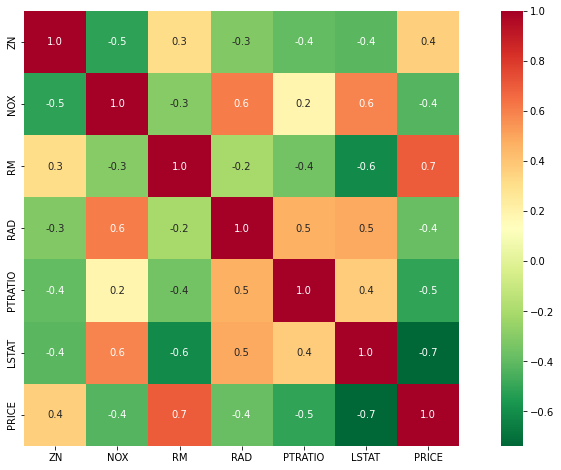

In [105]:
# 상관계수 행렬
cm = np.corrcoef(df[features].values.T)
plt.figure(figsize=(15,8))
hm = sns.heatmap(cm, cmap='RdYlGn_r', cbar=True, annot=True, square=True, fmt='.1f', 
                 xticklabels=features, yticklabels=features)

# cmap : 히트맵 색상 변경하기 위한 컬러맵 지정
# annot : 히트맵의 상관계수 출력 여부 지정
# fmt : 상관계수 출력시 자릿수 지정
# ticlabels : 히트맵 축 레이블 출력시 컬럼명 지정
# cbar, square : 컬러맵 막대 표시여부와 히트맵 출력 모양 지정

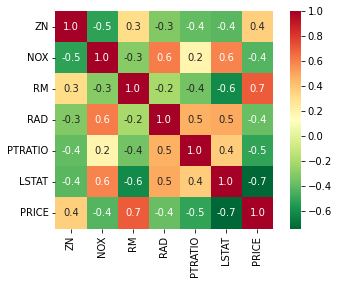

In [106]:
hm = sns.heatmap(cm, cmap='RdYlGn_r', cbar=True, annot=True, square=True, fmt='.1f', 
                 xticklabels=features, yticklabels=features)

In [133]:
# 회귀분석 실시
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Xtrain , Xtest, ytrain, ytest = train_test_split(boston.data,boston.target, train_size=0.7, random_state=2111081145)

np.set_printoptions(precision=2)
print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))
      
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)
print('기울기', lrclf.coef_[0])
print('절편', np.round(lrclf.intercept_,2))

기울기 [1.]
절편 87.67
기울기 -0.1124198096398262
절편 29.15


## 공부한 시간 대비 성적 예측을 LinearRegression으로 풀어 봄

In [134]:
Xtrain , Xtest, ytrain, ytest = train_test_split(pd.DataFrame(time), jumsu, train_size=0.9, random_state=2111081145)

lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))

기울기 [1.]
절편 87.67


In [135]:
# train/test없이 바로 테스트
# reshape(-1,1) : 행 우선 데이터를 열 우선 데이터로 변경
# [1,2,3,4,5] => reshape => [[1, [2], [3]] # 리쉐잎을 했을ㄸ떄 데이터가 이렇게 바뀐다는것.

# 종속변수 구조 재배열
np.array(time)
np.array(time).reshape(-1,1)

lrclf = LinearRegression()
lrclf.fit(np.array(time).reshape(-1,1), jumsu) # 2차원 배열을 1차원으로 바꾸는 것.)

print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))

기울기 [2.3]
절편 79.0


## 공부한 시간 대비 성적 예측을 statsmodels의 OLS로 풀어봄 

In [136]:
## 따로 필요한 패키지 설치
!pip install statsmodels # 통계 기반 모델을 이용하여 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.8 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 12.3 MB/s eta 0:00:01


In [137]:
import statsmodels.api as sm

In [139]:
df = pd.DataFrame({'time':time, 'jumsu':jumsu})
df.head()

,time,jumsu
0,2,81
1,4,93
2,6,91
3,8,97


In [140]:
# OLS(종속변수, 독립변수, 옵션)
lm = sm.OLS(df.jumsu, df.time)
result = lm.fit()
result.summary()

/home/hadoop/.local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  jumsu   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              20.53
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                      0.0201
Time:                        12:44:03   Log-Likelihood:                         -19.586
No. Observations:                   4   AIC:                                      41.17
Df Residuals:                       3   BIC:                                      40.56
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time          15.4667      3.413      4.531      0.020       4.604      26.329
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.492
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.391
Skew:                          -0.105   Prob(JB):                        0.822
Kurtosis:                       1.483   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""